<a href="https://colab.research.google.com/github/drfperez/DeepPurpose/blob/main/SwissdockAnalysisOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Convert clusters.csv to deltaG.csv with only negative numbers


import pandas as pd
import math
from google.colab import files

def convert_to_row(csv_path):
    # Read the CSV file
    df = pd.read_csv(csv_path, sep='\s+')

    # Check if 'deltaG' column exists
    if 'deltaG' not in df.columns:
        print("Error: 'deltaG' column not found in the uploaded CSV file.")
        return None

    # Select all values under the 'deltaG' column, excluding the header
    deltaG_values = df['deltaG'].values.tolist()

    # Filter out deltaG values of zero and bigger than zero
    filtered_deltaG_values = [value for value in deltaG_values
                              if not math.isnan(value) and value is not None
                              and isinstance(value, (int, float)) and value < 0]

    # Create a row by joining all the filtered 'deltaG' values with commas
    row = ','.join(map(str, filtered_deltaG_values))

    return row

# Upload the CSV file
uploaded = files.upload()

# Get the uploaded file name
uploaded_file_name = list(uploaded.keys())[0]

# Convert the uploaded file to a row
row = convert_to_row(uploaded_file_name)

if row is not None:
    # Save the row to a CSV file
    output_csv_path = "deltaG_values.csv"
    with open(output_csv_path, 'w') as file:
        file.write(row)

    # Download the converted CSV file
    files.download(output_csv_path)

Saving clusters.dock4.1EEA.GinkgolideY.csv to clusters.dock4.1EEA.GinkgolideY.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Upload CSV files one by one. Press Cancel to stop uploading.


Saving deltaG_values(1).csv to deltaG_values(1) (3).csv


Saving deltaG_values(2).csv to deltaG_values(2) (3).csv


Saving deltaG_values(3).csv to deltaG_values(3) (3).csv


Saving deltaG_values(4).csv to deltaG_values(4) (3).csv


Saving deltaG_values(5).csv to deltaG_values(5) (3).csv


Saving deltaG_values(6).csv to deltaG_values(6) (3).csv


Saving deltaG_values(7).csv to deltaG_values(7) (3).csv


Enter the real chemical name for Compound A: Donepezil
Enter the real chemical name for Compound B: Ginkgolide A
Enter the real chemical name for Compound C: Ginkgolide B
Enter the real chemical name for Compound D: Ginkgolide C
Enter the real chemical name for Compound E: Ginkgolide J
Enter the real chemical name for Compound F: Ginkgolide M
Enter the real chemical name for Compound G: Ginkgolide Y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

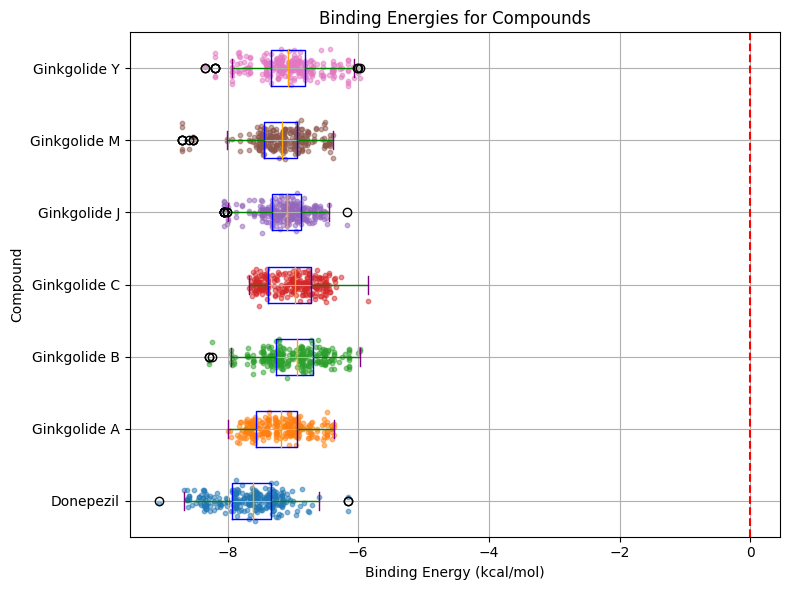

In [ ]:
# 3. Upload several deltaG_values.csv from different molecular dockings to obtain a boxplot type figure

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Prompt the user to enter real chemical names for each compound
real_names_mapping = {}
for i, df_name in enumerate(transposed_df.columns):
    real_name = input(f"Enter the real chemical name for {df_name}: ")
    real_names_mapping[df_name] = real_name

# Create a customized boxplot for compounds
plt.figure(figsize=(8, 6))

# Set colors
box_color = 'blue'
median_color = 'orange'
whisker_color = 'green'
cap_color = 'purple'

# Create a boxplot
boxprops = dict(color=box_color)
medianprops = dict(color=median_color)
whiskerprops = dict(color=whisker_color)
capprops = dict(color=cap_color)
boxplot = transposed_df.boxplot(vert=False, return_type='dict', boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

# Overlay individual data points
for df_name in transposed_df.columns:
    y = np.random.normal(list(transposed_df.columns).index(df_name) + 1, 0.1, size=len(transposed_df[df_name]))
    plt.scatter(transposed_df[df_name], y, alpha=0.5, s=10)

# Set ticks and labels
plt.yticks(np.arange(1, len(transposed_df.columns) + 1), [real_names_mapping[col] for col in transposed_df.columns])

plt.xlabel('Binding Energy (kcal/mol)')
plt.ylabel('Compound')
plt.title('Binding Energies for Compounds')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')  # Add line at 0 for reference
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'boxplot.png'
plt.savefig(plot_image_path)

# Download the transposed CSV file and the plot image
files.download(transposed_csv_path)
files.download(plot_image_path)

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('transposed_table.csv')

# Define a function to clean the data
def clean_data(value):
    return isinstance(value, (int, float)) and value < 0

# Apply the function to filter the DataFrame
cleaned_df = df.applymap(clean_data)

# Save the cleaned DataFrame to a new CSV file
cleaned_df.to_csv('clean_table.csv', index=False)

In [ ]:
# 2. Upload several deltaG_values.csv from different molecular dockings to obtain a bar type figure

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import io

# Initialize an empty list to store DataFrame objects
dfs = []

# Upload CSV files one by one
print("Upload CSV files one by one. Press Cancel to stop uploading.")
while True:
    uploaded_files = files.upload()
    if len(uploaded_files) == 0:
        break
    for filename, contents in uploaded_files.items():
        # Read CSV file as DataFrame and append it to the list
        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), header=None)
        # Add a column to identify the compound
        df['Compound'] = f'Compound {chr(ord("A") + len(dfs))}'
        dfs.append(df)

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Transpose the DataFrame so that rows become columns
transposed_df = combined_df.set_index('Compound').T

# Save the transposed DataFrame to a new CSV file
transposed_csv_path = 'transposed_data.csv'
transposed_df.to_csv(transposed_csv_path)

# Prompt the user to enter customized names for each compound
custom_names_mapping = {}
for i, df_name in enumerate(transposed_df.columns):
    custom_name = input(f"Enter customized name for {df_name}: ")
    custom_names_mapping[df_name] = custom_name

# Calculate statistics for each compound
statistics_df = pd.DataFrame({
    'Mean': transposed_df.mean(),
    'Standard Deviation': transposed_df.std(),
    'Minimum': transposed_df.min(),
    'Maximum': transposed_df.max(),
    'Number of Data': transposed_df.count()
})

# Save statistics to a CSV file
statistics_csv_path = 'compound_statistics.csv'
statistics_df.to_csv(statistics_csv_path)

# Create a bar graph with mean and standard deviation
plt.figure(figsize=(10, 6))
mean_values = statistics_df['Mean']
std_values = statistics_df['Standard Deviation']
plt.bar([custom_names_mapping[col] for col in mean_values.index], mean_values, yerr=std_values, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel('Compound')
plt.ylabel('Binding Energy (kcal/mol)')
plt.title('Mean Binding Energy with Standard Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save the plot as an image file
plot_image_path = 'mean_with_std_bar_plot.png'
plt.savefig(plot_image_path)

# Download the transposed DataFrame, statistics CSV file, and plot image
files.download(transposed_csv_path)
files.download(statistics_csv_path)
files.download(plot_image_path)

# Display the statistics DataFrame
statistics_df

Upload CSV files one by one. Press Cancel to stop uploading.


KeyboardInterrupt: 

In [ ]:
# 4. Statistical analysis: parametric and non-parametric data
!pip install scikit_posthocs
import pandas as pd
from scipy.stats import shapiro, levene, kruskal, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read CSV file into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Get the list of columns starting with "Compound"
compound_columns = [col for col in df.columns if col.startswith('Compound')]

# Lists to store results
normality_results = []
homogeneity_results = []

# Check normality and homogeneity of variances for each compound column
for col in compound_columns:
    # Shapiro-Wilk test for normality
    stat, p_normal = shapiro(df[col])
    normality_results.append((col, stat, p_normal))

# Check if any column is not normally distributed
if any(p_normal < 0.05 for _, _, p_normal in normality_results):
    print("\nAt least one column is not normally distributed.")
    # Perform Kruskal-Wallis test
    kruskal_results = kruskal(*[df[col] for col in compound_columns])

    # Print Kruskal-Wallis test results
    print("\nKruskal-Wallis Test Results:")
    print("H-statistic:", kruskal_results.statistic)
    print("p-value:", kruskal_results.pvalue)

    # Check if there are significant differences (p < 0.05)
    if kruskal_results.pvalue < 0.05:
        # Perform Dunn's test for pairwise comparisons
        df_melted = df.melt(value_vars=compound_columns, var_name='Group', value_name='Value')
        dunn_results = posthoc_dunn(df_melted, val_col='Value', group_col='Group', p_adjust='holm')

        # Print Dunn's test results
        print("\nDunn's Test Results:")
        print(dunn_results)
    else:
        print("No significant differences detected.")
else:
    print("\nAll columns are normally distributed.")

    # Levene's test for homogeneity of variances
    stat, p_homogeneity = levene(*[df[col] for col in compound_columns])
    print("\nHomogeneity of Variances Test Results:")
    print("Test statistic:", stat)
    print("p-value:", p_homogeneity)

    # Check if homogeneity of variances is satisfied
    if p_homogeneity > 0.05:
        # Perform one-way ANOVA test
        anova_results = f_oneway(*[df[col] for col in compound_columns])

        # Print ANOVA results
        print("\nANOVA Results:")
        print("F-statistic:", anova_results.statistic)
        print("p-value:", anova_results.pvalue)

        # Check if there are significant differences (p < 0.05)
        if anova_results.pvalue < 0.05:
            # Perform Tukey's HSD test
            tukey_results = pairwise_tukeyhsd(df.melt(value_vars=compound_columns)['value'], df.melt(value_vars=compound_columns)['variable'])

            # Print Tukey's HSD results
            print("\nTukey's HSD Results:")
            print(tukey_results)
        else:
            print("No significant differences detected.")
    else:
        print("Homogeneity of variances is satisfied.")

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Calculate if there are statistically significant differences (Student's t test) in transposed CSV deltaG combined csv
import pandas as pd
from scipy.stats import ttest_ind
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read CSV file into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Calculate statistics
mean_compound_a = df['Compound A'].mean()
std_compound_a = df['Compound A'].std()
count_compound_a = len(df['Compound A'])

mean_compound_b = df['Compound B'].mean()
std_compound_b = df['Compound B'].std()
count_compound_b = len(df['Compound B'])

# Calculate t-statistic and p-value
t_statistic, p_value = ttest_ind(df['Compound A'], df['Compound B'])

# Create a DataFrame for the statistics
statistics_df = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', 'Number of Data'],
    'Compound A': [mean_compound_a, std_compound_a, count_compound_a],
    'Compound B': [mean_compound_b, std_compound_b, count_compound_b]
})

# Add t-statistic and p-value to the DataFrame
statistics_df['t-statistic'] = [None, None, None]
statistics_df['p-value'] = [None, None, None]
statistics_df.loc[2, 't-statistic'] = t_statistic
statistics_df.loc[2, 'p-value'] = p_value

# Print the DataFrame
print(statistics_df)

Saving transposed_data (12).csv to transposed_data (12) (1).csv
            Statistic  Compound A  Compound B t-statistic   p-value
0                Mean   -6.986684   -7.070119        None      None
1  Standard Deviation    0.448293    0.476528        None      None
2      Number of Data  256.000000  256.000000    2.040421  0.041823


In [ ]:


import pandas as pd
from scipy.stats import ttest_ind
from itertools import combinations
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read CSV file into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Get list of compound columns
compound_columns = [col for col in df.columns if col.startswith('Compound')]

# Initialize a dictionary to store p-values
p_values = {}

# Perform pairwise t-tests for all combinations of compounds
for compound_1, compound_2 in combinations(compound_columns, 2):
    t_statistic, p_value = ttest_ind(df[compound_1], df[compound_2])
    p_values[(compound_1, compound_2)] = p_value

# Construct a square table with p-values
table = pd.DataFrame(index=compound_columns, columns=compound_columns)

for compound_1 in compound_columns:
    for compound_2 in compound_columns:
        if compound_1 == compound_2:
            table.loc[compound_1, compound_2] = '-'
        else:
            p_value = p_values.get((compound_1, compound_2), p_values.get((compound_2, compound_1), '-'))
            table.loc[compound_1, compound_2] = p_value

# Display the table
print(table)

Saving transposed_data (12).csv to transposed_data (12).csv
           Compound A Compound B
Compound A          -   0.041823
Compound B   0.041823          -


In [ ]:


import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read CSV file into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Get list of compound columns
compound_columns = [col for col in df.columns if col.startswith('Compound')]

# Perform one-way ANOVA test
anova_results = f_oneway(*[df[col] for col in compound_columns])

# Print ANOVA results
print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

# Check if there are significant differences (p < 0.05)
if anova_results.pvalue < 0.05:
    # Reshape the data into a format suitable for Tukey's HSD test
    melted_df = pd.melt(df, value_vars=compound_columns, var_name='Compound', value_name='Value')

    # Perform Tukey's HSD test
    tukey_results = pairwise_tukeyhsd(melted_df['Value'], melted_df['Compound'])

    # Print the results
    print("\nTukey's HSD Results:")
    print(tukey_results)
else:
    print("No significant differences detected.")

Saving transposed_data (12).csv to transposed_data (12) (1).csv
ANOVA Results:
F-statistic: 4.163318522681577
p-value: 0.04182290395375373

Tukey's HSD Results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Compound A Compound B  -0.0834 0.0418 -0.1638 -0.0031   True
------------------------------------------------------------


In [ ]:

import pandas as pd
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read CSV file into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Get list of compound columns
compound_columns = [col for col in df.columns if col.startswith('Compound')]

# Lists to store results
normality_results = []
homoscedasticity_results = []

# Check normality and homogeneity of variances for each column
for col in compound_columns:
    # Shapiro-Wilk test for normality
    stat, p_normal = shapiro(df[col])
    normality_results.append((col, stat, p_normal))

    # Levene's test for homogeneity of variances
    stat, p_homosced = levene(*[df[col] for col in compound_columns])
    homoscedasticity_results.append((col, stat, p_homosced))

# Print normality results
print("Normality Test Results:")
for result in normality_results:
    print(result)

# Print homoscedasticity results
print("\nHomogeneity of Variances Test Results:")
for result in homoscedasticity_results:
    print(result)

# Check if all columns are normally distributed and homoscedastic
if all(p_normal > 0.05 for _, _, p_normal in normality_results) and all(p_homosced > 0.05 for _, _, p_homosced in homoscedasticity_results):
    # Perform one-way ANOVA test
    anova_results = f_oneway(*[df[col] for col in compound_columns])

    # Print ANOVA results
    print("\nANOVA Results:")
    print("F-statistic:", anova_results.statistic)
    print("p-value:", anova_results.pvalue)

    # Check if there are significant differences (p < 0.05)
    if anova_results.pvalue < 0.05:
        # Reshape the data into a format suitable for Tukey's HSD test
        melted_df = pd.melt(df, value_vars=compound_columns, var_name='Compound', value_name='Value')

        # Perform Tukey's HSD test
        tukey_results = pairwise_tukeyhsd(melted_df['Value'], melted_df['Compound'])

        # Print the results
        print("\nTukey's HSD Results:")
        print(tukey_results)
    else:
        print("No significant differences detected.")
else:
    print("The data does not meet the assumptions for ANOVA and Tukey's HSD tests.")

Saving transposed_data (12).csv to transposed_data (12).csv
Normality Test Results:
('Compound A', 0.9885364174842834, 0.0397573858499527)
('Compound B', 0.9839290380477905, 0.0055356151424348354)

Homogeneity of Variances Test Results:
('Compound A', 9.063471429129598e-05, 0.9924077957351121)
('Compound B', 9.063471429129598e-05, 0.9924077957351121)
The data does not meet the assumptions for ANOVA and Tukey's HSD tests.


In [ ]:
#Old version 1.Upload clusters.dock4.csv file from Swissdock docking results in order to obtain  deltaG_values.csv

import pandas as pd
from google.colab import files

def convert_to_row(csv_path):
    # Read the CSV file
    df = pd.read_csv(csv_path, sep='\s+')

    # Check if 'deltaG' column exists
    if 'deltaG' not in df.columns:
        print("Error: 'deltaG' column not found in the uploaded CSV file.")
        return None

    # Select all values under the 'deltaG' column, excluding the header
    deltaG_values = df['deltaG'].values.tolist()

    # Create a row by joining all the 'deltaG' values with commas
    row = ','.join(map(str, deltaG_values))

    return row

# Upload the CSV file
uploaded = files.upload()

# Get the uploaded file name
uploaded_file_name = list(uploaded.keys())[0]

# Convert the uploaded file to a row
row = convert_to_row(uploaded_file_name)

if row is not None:
    # Save the row to a CSV file
    output_csv_path = "deltaG_value.csv"
    with open(output_csv_path, 'w') as file:
        file.write(row)

    # Download the converted CSV file
    files.download(output_csv_path)

Saving clusters.dock4 (1).csv to clusters.dock4 (1) (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving transposed_data (12).csv to transposed_data (12).csv


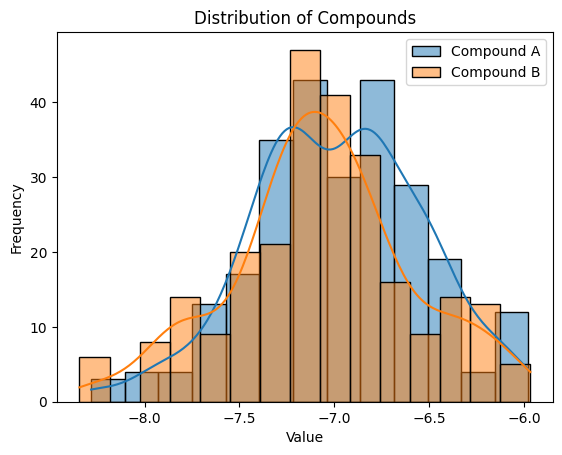

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read CSV file into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Plot each compound column as a line plot
for col in df.columns:
    if col.startswith('Compound'):
        sns.histplot(df[col], kde=True, label=col)

# Add legend
plt.legend()

# Set plot title and labels
plt.title('Distribution of Compounds')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

Saving deltaG_values.csv to deltaG_values (1).csv


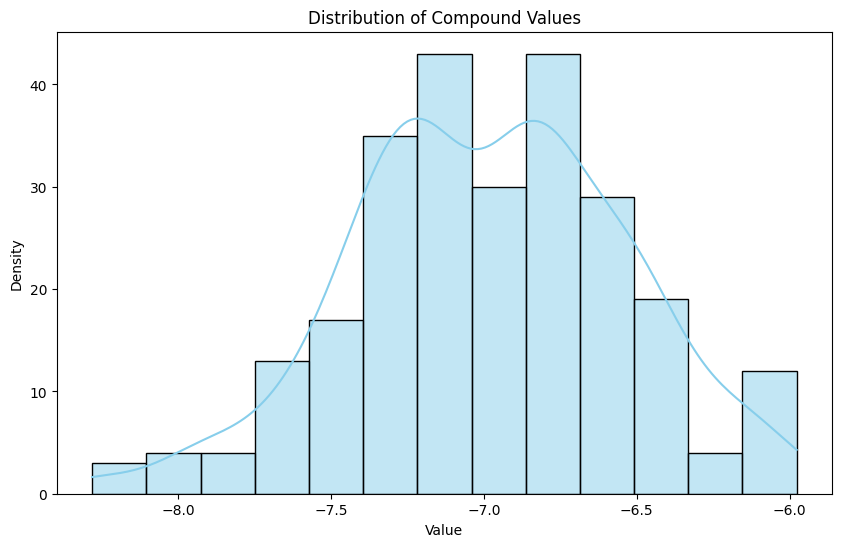

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read CSV file into DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]), header=None)

# Transpose DataFrame to have compounds as columns
df = df.transpose()

# Plot the compound values as a histogram with a density curve
plt.figure(figsize=(10, 6))
sns.histplot(df.values.flatten(), kde=True, color='skyblue')

# Set plot title and labels
plt.title('Distribution of Compound Values')
plt.xlabel('Value')
plt.ylabel('Density')

# Show plot
plt.show()